<a href="https://colab.research.google.com/github/fatimazain118/ML/blob/main/Lab4/DecisionTree_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [426]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Exploration and Visualization of MPG Data

In [427]:
data = pd.read_csv("/content/gdrive/MyDrive/mpg.csv.zip")

In [428]:
data.shape

(398, 9)

In [429]:
data.ndim

2

In [430]:
data.head(n=7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala


In [431]:
data.tail(n=7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [432]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [433]:
#here we see the horsepower being object but we know that it contains numerc values lets inspect

In [434]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [435]:
data = data[data.horsepower != "?"]

In [436]:
data.shape

(392, 9)

In [437]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [438]:
data.horsepower = data.horsepower.astype("float")      #object type has been changed to float

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [439]:
data.dtypes    

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [440]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [441]:
data['mpg'].kurt()

-0.5159934946351457

In [442]:
from sklearn.metrics import mean_squared_error, r2_score

In [443]:
from sklearn.model_selection import train_test_split
df=data

In [444]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [445]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [446]:
training_features = [ 'acceleration','displacement','horsepower','origin','displacement','model_year']
#Wt and cylinders dropped because of high correlation with displacement above 0.9
#name is dropped

target = 'mpg'
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.11, random_state=66)
#,random_state=88) #train_size=0.89
#,  #0.1 to 0.2
    #    #random state 1 to 10000

In [447]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mae', max_depth=8, min_samples_leaf=6) #these parameter we have put to control the tree depth (mae,mse)

In [448]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [449]:
model.get_depth()

8

In [450]:
#from sklearn.neighbors import KNeighborsRegressor
#model = KNeighborsRegressor(n_neighbors=4,p=2,weights='distance')# p=1 or p = 2 2 i manhattan 2 euclidean


[Text(186.95286885245903, 205.35999999999999, 'X[1] <= 190.5\nmae = 6.491\nsamples = 348\nvalue = 23.0'),
 Text(100.8516393442623, 181.2, 'X[2] <= 76.5\nmae = 4.813\nsamples = 198\nvalue = 28.0'),
 Text(50.768852459016394, 157.04, 'X[5] <= 77.5\nmae = 4.238\nsamples = 90\nvalue = 32.0'),
 Text(24.698360655737705, 132.88, 'X[4] <= 89.0\nmae = 3.105\nsamples = 38\nvalue = 29.0'),
 Text(10.97704918032787, 108.72, 'X[3] <= 2.5\nmae = 1.679\nsamples = 14\nvalue = 31.0'),
 Text(5.488524590163935, 84.56, 'mae = 2.0\nsamples = 6\nvalue = 30.0'),
 Text(16.465573770491805, 84.56, 'mae = 0.938\nsamples = 8\nvalue = 32.0'),
 Text(38.41967213114754, 108.72, 'X[5] <= 74.5\nmae = 2.312\nsamples = 24\nvalue = 26.0'),
 Text(27.442622950819672, 84.56, 'X[2] <= 71.0\nmae = 1.667\nsamples = 12\nvalue = 25.5'),
 Text(21.95409836065574, 60.400000000000006, 'mae = 0.667\nsamples = 6\nvalue = 26.0'),
 Text(32.93114754098361, 60.400000000000006, 'mae = 1.667\nsamples = 6\nvalue = 23.0'),
 Text(49.3967213114754

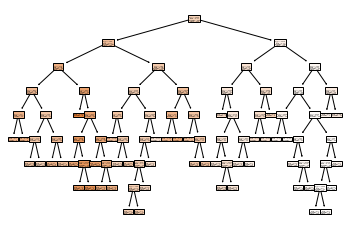

In [451]:
from sklearn.tree import plot_tree
plot_tree(model, filled = True)

In [452]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 5.61
R Square score: 0.91
